# How to copy a QComponent

Start by importing QisKit Metal:

In [1]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict #, open_docs

Then let's fire up the GUI:

In [2]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

Now we'll put one transmon at the origin:

In [3]:
# Let's start by putting a transmon at the origin:
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
design.overwrite_enabled = True
q1 = TransmonPocket(design, 'Q1')
gui.rebuild()
gui.autoscale()

First, we'll copy the component and then manually modify the coordinates to be at (1,0) instead of (0,0):

In [4]:
# Now let's copy the transmon at the origin and put it at position (0,1):
q1_copy = design.copy_qcomponent(q1, 'Q1_copy')
q1_copy.options['pos_x']='1.0mm'
gui.rebuild()
gui.autoscale()

Now, we'll copy the original component and in the same step we'll move the copy to (-1,0) by passing a dictionary to the "copy_qcomponent" command:

In [5]:
# Now let's copy the transmon at the origin and put it at position (0,-1):
q1_anothercopy = design.copy_qcomponent(q1,'Q1_another_copy', dict(pos_x='-1.0mm'))
gui.rebuild()
gui.autoscale()

We can copy multiple components at once using the "copy_multiple_qcomponents" command. Here's an example that copies the three components we've just created (Q1 and the two copies: Q1_copy and Q1_another_copy) and moves them up by 2.0mm each: 

In [6]:
# Now let's copy all three components at the same time, moving them up by +2mm in the y-direction:
newcopies = design.copy_multiple_qcomponents([q1, q1_copy, q1_anothercopy], ['Q3', 'Q4', 'Q5'], [dict(pos_y='1.0mm'), dict(pos_y='2.0mm'), dict(pos_y='3.0mm')])
gui.rebuild()
gui.autoscale()

Note that we can also copy multiple qcomponents without passing dictionaries. In this case, the copied qcomponents will sit on top of of the original qcomponents in the layout:

In [7]:
# Example of copying without giving any dictionary values; qcomponents will sit on top of the originals!
newcopies2 = design.copy_multiple_qcomponents([q1, q1_copy, q1_anothercopy], ['Q6', 'Q7', 'Q8'])
gui.rebuild()
gui.autoscale()

Note also that we can copy multiple qcomponents but only give a dictionary to one of them. The other two dictionaries still need to exist but can be empty: 

In [8]:
# Copy the three original components but only give a dictionary for the first one; other two dictionaries still need to exist but can be empty:
newcopies3 = design.copy_multiple_qcomponents([q1, q1_copy, q1_anothercopy], ['Q9', 'Q10', 'Q11'], [dict(pos_y='-1.0mm'), dict(), dict()])
gui.rebuild()
gui.autoscale()

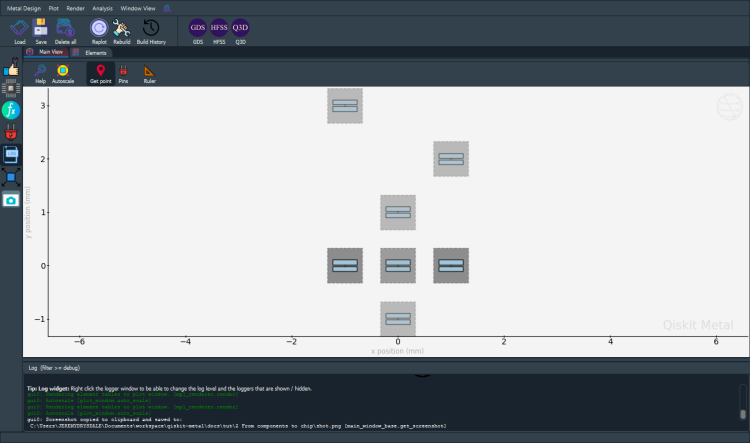

In [10]:
gui.screenshot()